<a href="https://colab.research.google.com/github/Bduz/intro_ml/blob/main/intro_rl/ddpg/DDPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Deterministic Policy Gradients (DDPG)
---
In this notebook, we train DDPG with OpenAI Gym's Pendulum-v0 environment.

### 1. Import the Necessary Packages

In [1]:
!git clone https://github.com/Bduz/intro_ml.git

Cloning into 'intro_ml'...
remote: Enumerating objects: 567, done.
remote: Counting objects: 100% (277/277), done.
remote: Compressing objects: 100% (216/216), done.
remote: Total 567 (delta 137), reused 131 (delta 56), pack-reused 290
Receiving objects: 100% (567/567), 52.71 MiB | 14.64 MiB/s, done.
Resolving deltas: 100% (283/283), done.


In [2]:
import sys
sys.path.insert(0, '/content/intro_ml/intro_rl/ddpg/')

In [3]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
!pip install swig
!pip install gymnasium[box2d]
import gymnasium as gym

from ddpg_agent import Agent

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 41.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2376135 sha256=00323260ba700e341ed915b26b3c8670191489af0ebe55cebb97c3b0ad7cd24a
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py


In [4]:
import os
os.environ['SDL_VIDEODRIVER']='dummy'
import pygame
pygame.display.set_mode((640,480))

<Surface(640x480x32 SW)>

### 2. Instantiate the Environment and Agent

In [5]:
env_name = "Pendulum-v1"
reward_threshold = 200
env = gym.make(env_name)
env_seed = 0
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.shape)

agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.shape[0], random_seed=2)

State shape:  (3,)
Number of actions:  (1,)


### 3. Train the Agent with DDPG

Episode 100	Average Score: -1416.94
Episode 200	Average Score: -1163.27
Episode 300	Average Score: -957.53
Episode 400	Average Score: -797.04


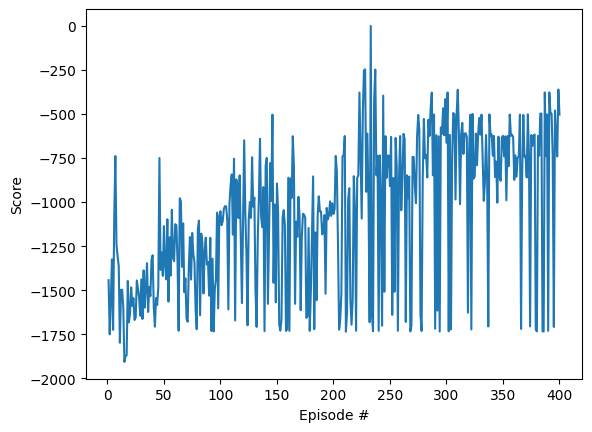

In [6]:
def ddpg(n_episodes=400, max_t=200, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        state, info = env.reset()
        agent.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")

        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')

        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))

    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In [11]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

state, _ = env.reset()
for t in range(200):
    action = agent.act(state, add_noise=False)
    #env.render()
    state, reward, terminated, truncated, _ = env.step(action)
    if terminated or truncated:
        break

env.close()

### 6. Explore

In this exercise, we have provided a sample DDPG agent and demonstrated how to use it to solve an OpenAI Gym environment.  To continue your learning, you are encouraged to complete any (or all!) of the following tasks:
- Amend the various hyperparameters and network architecture to see if you can get your agent to solve the environment faster than this benchmark implementation.  Once you build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task!
- You may also like to implement prioritized experience replay, to see if it expedites learning.  
- The current implementation adds Ornsetein-Uhlenbeck noise to the action space.  However, it has [been shown](https://openai.com/research/better-exploration-with-parameter-noise/) that adding noise to the parameters of the neural network policy can improve performance.  Make this change to the code, to verify it for yourself!
